In [4]:
import pandas
data = pandas.read_excel('trips_data.xlsx', index_col=0)

In [8]:
data.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


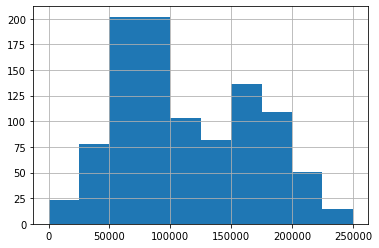

In [10]:
data.salary.hist()

In [12]:
data.head(7)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney
5,209000,Новосибирск,55,Архитектура,Самолет,2,Tokio
6,59000,Минск,53,Пляжный отдых,Автомобиль,1,London


In [13]:
data.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

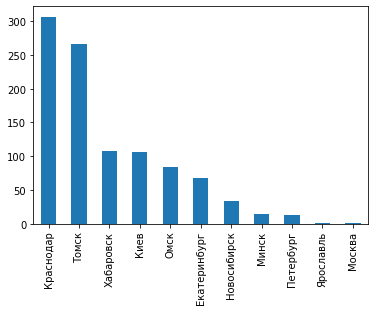

In [16]:
data.city.value_counts().plot(kind='bar')

In [45]:
trips = pandas.get_dummies(data, columns=['city', 'vacation_preference', 'transport_preference'])
#створює бінарні колонки для кожного елемента в колонці
trips.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
X = trips.drop('target', axis=1)
y = trips.target

In [20]:
model.fit(X, y)#навчання моделі

RandomForestClassifier()

In [25]:
{col:[0] for col in X.columns}

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [29]:
example = {'salary': [16000],
 'age': [22],
 'family_members': [2],
 'city_Екатеринбург': [0],
 'city_Киев': [1],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [1],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1]}
example_table = pandas.DataFrame(example)

In [64]:
print(model.predict(example_table))#предікт
print(*model.classes_)#можливі варіанти результату
print(*model.predict_proba(example_table)[0], sep='\t')#імовірність вибору кожного з варіантів

['Paris']
London New York Paris Sydney Tokio
0.08	0.18	0.65	0.03	0.06


In [47]:
trips.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [41]:
print(model.feature_importances_)#коефіцієнти важливості колонок

[2.39225150e-01 1.99200123e-01 1.61511998e-01 1.57368399e-02
 1.30681690e-02 2.15164529e-02 3.74190157e-03 1.46461607e-04
 6.78732486e-03 1.50364504e-02 2.06286753e-03 1.90719175e-02
 1.41487059e-02 3.54364245e-04 3.30756672e-02 2.27280441e-04
 3.20974879e-02 7.11450238e-02 4.03550048e-02 2.90400250e-04
 2.22856939e-02 2.84459346e-02 6.04687806e-02]
